# Experiment: UV-Vis titration
Test compound (arachadonic acid at 10 mM in DMSO) titrated into cuvette containing P[**P450 BM3**](https://www.ncbi.nlm.nih.gov/pubmed/12076537) wild type (just heme domain). UV-vis absorbance from 200-800 nm measured at every incrament.  **Backround:** The spin potential of the active site heme iron changes as compounds bind there, resulting in a shift absorbance. The magnitude of the shift in response to ```[substrate]``` can be quantified and used to calculate the ```kd``` - dissosciation constant between the enzyme and substrate using [**Michaelis-Menten kinetics**](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics) - even though not reactions take place.

# Examples:
### Overlayed spectra
The [**Soret**](https://en.wikipedia.org/wiki/Soret_peak) peak at 420 nm collapses and a new peak at 390 nm rises as ```[substrate]``` increases.  

![](tutorial-data/titrations/Tirtrations-arachadonic-acid-5-traces.png)
### response
Subtract the trace at ```[substrate] == 0 ``` to isolate the response of the protein to the substrate, this can be useful to identify different types of shift.
![](tutorial-data/titrations/Tirtrations-arachadonic-acid-5-diff-traces.png)

### Response * ```[substrate]```
Response is calculated as $ |\Delta A_{390}| + |\Delta A_{420}|$ at each concentration. The Michaelis-Menten equation: $v = \frac {v_{max} \times [substrate]}{k_m + [substrate]}$ is used to describe the binding. $[substrate]$ is known at each step, $v$ is the response and $v_{max}$ and $k_m$ are unknown variables that are determined during the curve-fitting process.


![](tutorial-data/titrations/Tirtrations-arachadonic-acid-5-michaelis-menten.png)

# data description
The data is in a ```csv``` file generate by the Varian UV-Vis spectrometer which contains:
* Wavelength (nm) - duplicated in every measurement
* Sample absorbance at each wavelength
* User-input sample names - contain vol ```substrate``` added
* Information about the machine at the foot of the file

# aim:
* create dataframe from ```csv``` fie
* ✂ Remove unnecessary information ✂
* Plot traces - with substrate concentration labels
* Extract sample information, calculate ```[substrate]```
* Measure response at each ```[substrate]```, fit Michaelis-Menten curve - find ```kd``` and ```vmax```
# contents
1. 🐼 Using ```pandas``` to create a data frame from a ```csv``` file, cleaning data ✂️
2. 📈 Plotting traces, and the change relative to substrate-free trace 
3. 📝 Using regex to extract compound vols from the user input data 
4. 📏 Quantifying the response and curve fitting - Michaelis Menten

# 1. ```pandas```
The [**pandas**](https://pandas.pydata.org/pandas-docs/stable/) library is a toolbox for tabular data, e.g. ```csv, xlsx```.  In this case ```pandas.read_csv``` is used to create a ```DataFrame``` - an object that contains the data and functions for manipulating it. Throughout **secion 1** the ```DataFrame``` object will be manipulated to select the information of interest.

```pandas``` is indispensible in most of my data analysis tasks. For a detailed overview, look at Jake Vaan der Plaas' [**Chapter on pandas**](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) in the [**Python Data Science Handbook (free e-book)
**](https://jakevdp.github.io/PythonDataScienceHandbook/).

The core object of the ```pandas``` library is the ```DataFrame``` - a 2D table (also, the ```Series``` - a single colum). The object can be used to work with large datasets very efficiently, and offers lots of functions that deal with filtering and locating data as well as mathmatical operations and even built-in plotting. 

## In this section
* A ```DataFrame``` called ```df``` is created from a ```csv``` file - a table containing all of the information in the ```csv```. Several **trim** operations ✂️ will be introduced to refine the data selection in ```df```
* **Exercise:** create a fuction that cleans the ```csv``` provided - removing trailing information, seting suitable column headers and index,removing duplicated columns and ensuring that ```df``` contains ```floats``` and ```ints``` where suitable, rather than ```strings``` of the numbers e.g. ```'3.24'```

In [1]:
import pandas as pd

# usually, pd.read_csv(filepath) e.g. pd.read_csv('/Tutorials/tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_2.csv')
df = pd.read_csv('https://raw.githubusercontent.com/UoMMIB/Python-Club/master/Tutorials/tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_5.csv')
df.head() # first 5 rows
#df.tail() # last 5 rows

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_Acid_0.5,Unnamed: 9,...,Unnamed: 29,Arachadonic_Acid_7.0,Unnamed: 31,Arachadonic_Acid_8.0,Unnamed: 33,Arachadonic_Acid_9.0,Unnamed: 35,Arachadonic_Acid_10.0,Unnamed: 37,Unnamed: 38
0,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,...,Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,NaN
1,800.0281372,-0.0011736874,800.0281372,0.004030608572,800.0281372,0.008831423707,800.0281372,0.007053112611,800.0281372,0.01061017532,...,0.01727821678,800.0281372,0.02329324558,800.0281372,0.01436490566,800.0281372,0.01514357515,800.0281372,0.02037685178,NaN
2,799.0550537,-0.001497765072,799.0550537,-0.001620179624,799.0550537,0.00470665656,799.0550537,0.008085762151,799.0550537,0.01180121396,...,0.01784328371,799.0550537,0.02186906524,799.0550537,0.01349939313,799.0550537,0.02210245468,799.0550537,0.01814198866,NaN
3,797.9424438,-0.0003967541561,797.9424438,0.006097461563,797.9424438,0.005836805329,797.9424438,0.009304532781,797.9424438,0.009330874309,...,0.02014354616,797.9424438,0.0249022115,797.9424438,0.0145706581,797.9424438,0.02447737008,797.9424438,0.02553883754,NaN
4,796.9685059,0.0008994067321,796.9685059,0.004539579619,796.9685059,0.008844553493,796.9685059,0.009598055854,796.9685059,0.01237882394,...,0.0237238463,796.9685059,0.02120030671,796.9685059,0.01822167076,796.9685059,0.01573968679,796.9685059,0.028930353,NaN


# some attributes of```pd.DataFrame```

In [2]:
print(df.index)
print()
print(df.columns)
print()
print(df.values) # array-like 

RangeIndex(start=0, stop=1191, step=1)

Index(['baseline', 'Unnamed: 1', 'bm3', 'Unnamed: 3', 'dmso_1.0', 'Unnamed: 5',
       'dmso_2.0', 'Unnamed: 7', 'Arachadonic_Acid_0.5', 'Unnamed: 9',
       'Arachadonic_Acid_1.0', 'Unnamed: 11', 'Arachadonic_Acid_1.5',
       'Unnamed: 13', 'Arachadonic_Acid_2.0', 'Unnamed: 15',
       'Arachadonic_Acid_2.5', 'Unnamed: 17', 'Arachadonic_Acid_3.0',
       'Unnamed: 19', 'Arachadonic_Acid_3.5', 'Unnamed: 21',
       'Arachadonic_Acid_4.0', 'Unnamed: 23', 'Arachadonic_Acid_4.5',
       'Unnamed: 25', 'Arachadonic_Acid_5.0', 'Unnamed: 27',
       'Arachadonic_Acid_6.0', 'Unnamed: 29', 'Arachadonic_Acid_7.0',
       'Unnamed: 31', 'Arachadonic_Acid_8.0', 'Unnamed: 33',
       'Arachadonic_Acid_9.0', 'Unnamed: 35', 'Arachadonic_Acid_10.0',
       'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

[['Wavelength (nm)' 'Abs' 'Wavelength (nm)' ... 'Wavelength (nm)' 'Abs'
  nan]
 ['800.0281372' '-0.0011736874' '800.0281372' ... '800.0281372'
  '0.02037

# constructing dataframe

In [3]:
test1 = pd.DataFrame([[1,2,3,4,5,6,7],
                    [2,3,6,2,5,4,5],
                    [8,3,7,6,4,7,3]])

test2 = pd.Series({'a':1, 'b':2, 'c':4, 'd':23, 'e':24})

pd.DataFrame([test2,test2])

,a,b,c,d,e
0,1,2,4,23,24
1,1,2,4,23,24


# ✂️ remove top row, rename columns ✂️

In [4]:
headers = df.columns
df = df.iloc[1:,:] # trim top row
df.columns = headers # replace with old headers
df.head()

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_Acid_0.5,Unnamed: 9,...,Unnamed: 29,Arachadonic_Acid_7.0,Unnamed: 31,Arachadonic_Acid_8.0,Unnamed: 33,Arachadonic_Acid_9.0,Unnamed: 35,Arachadonic_Acid_10.0,Unnamed: 37,Unnamed: 38
1,800.0281372,-0.0011736874,800.0281372,0.004030608572,800.0281372,0.008831423707,800.0281372,0.007053112611,800.0281372,0.01061017532,...,0.01727821678,800.0281372,0.02329324558,800.0281372,0.01436490566,800.0281372,0.01514357515,800.0281372,0.02037685178,NaN
2,799.0550537,-0.001497765072,799.0550537,-0.001620179624,799.0550537,0.00470665656,799.0550537,0.008085762151,799.0550537,0.01180121396,...,0.01784328371,799.0550537,0.02186906524,799.0550537,0.01349939313,799.0550537,0.02210245468,799.0550537,0.01814198866,NaN
3,797.9424438,-0.0003967541561,797.9424438,0.006097461563,797.9424438,0.005836805329,797.9424438,0.009304532781,797.9424438,0.009330874309,...,0.02014354616,797.9424438,0.0249022115,797.9424438,0.0145706581,797.9424438,0.02447737008,797.9424438,0.02553883754,NaN
4,796.9685059,0.0008994067321,796.9685059,0.004539579619,796.9685059,0.008844553493,796.9685059,0.009598055854,796.9685059,0.01237882394,...,0.0237238463,796.9685059,0.02120030671,796.9685059,0.01822167076,796.9685059,0.01573968679,796.9685059,0.028930353,NaN
5,795.9942017,-0.003192916978,795.9942017,0.002230643528,795.9942017,0.004110121168,795.9942017,0.009419404902,795.9942017,0.007388376165,...,0.01637113281,795.9942017,0.01929843985,795.9942017,0.01367275789,795.9942017,0.01877204701,795.9942017,0.02033358254,NaN


# ✂️ Make ```baseline``` index ✂️

In [5]:
df.index = df.iloc[:,0]
df.head()

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_Acid_0.5,Unnamed: 9,...,Unnamed: 29,Arachadonic_Acid_7.0,Unnamed: 31,Arachadonic_Acid_8.0,Unnamed: 33,Arachadonic_Acid_9.0,Unnamed: 35,Arachadonic_Acid_10.0,Unnamed: 37,Unnamed: 38
baseline,,,,,,,,,,,,,,,,,,,,,
800.0281372,800.0281372,-0.0011736874,800.0281372,0.004030608572,800.0281372,0.008831423707,800.0281372,0.007053112611,800.0281372,0.01061017532,...,0.01727821678,800.0281372,0.02329324558,800.0281372,0.01436490566,800.0281372,0.01514357515,800.0281372,0.02037685178,NaN
799.0550537,799.0550537,-0.001497765072,799.0550537,-0.001620179624,799.0550537,0.00470665656,799.0550537,0.008085762151,799.0550537,0.01180121396,...,0.01784328371,799.0550537,0.02186906524,799.0550537,0.01349939313,799.0550537,0.02210245468,799.0550537,0.01814198866,NaN
797.9424438,797.9424438,-0.0003967541561,797.9424438,0.006097461563,797.9424438,0.005836805329,797.9424438,0.009304532781,797.9424438,0.009330874309,...,0.02014354616,797.9424438,0.0249022115,797.9424438,0.0145706581,797.9424438,0.02447737008,797.9424438,0.02553883754,NaN
796.9685059,796.9685059,0.0008994067321,796.9685059,0.004539579619,796.9685059,0.008844553493,796.9685059,0.009598055854,796.9685059,0.01237882394,...,0.0237238463,796.9685059,0.02120030671,796.9685059,0.01822167076,796.9685059,0.01573968679,796.9685059,0.028930353,NaN
795.9942017,795.9942017,-0.003192916978,795.9942017,0.002230643528,795.9942017,0.004110121168,795.9942017,0.009419404902,795.9942017,0.007388376165,...,0.01637113281,795.9942017,0.01929843985,795.9942017,0.01367275789,795.9942017,0.01877204701,795.9942017,0.02033358254,NaN


### ✂️ use ```iloc[all rows : every second column]``` to get absorbance columns only ✂️

In [6]:
df = df.iloc[:,1::2]
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37
baseline,,,,,,,,,,,,,,,,,,,
800.0281372,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799.0550537,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
797.9424438,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
796.9685059,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
795.9942017,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


### ✂️ use ```dropna()``` to drop rows containing ```NaN``` values - empty cells to clip the machine information ✂️

In [7]:
df = df.dropna()
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37
baseline,,,,,,,,,,,,,,,,,,,
800.0281372,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799.0550537,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
797.9424438,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
796.9685059,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
795.9942017,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


### ✂️ Round wavelength in index to integers - for indexing✂️

In [9]:
df.index = [round(float(i)) for i in df.index]
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37
800,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
798,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
797,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
796,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


# Check shape of the ```DataFrame```: ```(rows:columns)```

In [10]:
df.shape

(601, 19)

### ✂️ Headers: the variable ```headers``` made earlier contains the original headings - sample names ✂️
### ✂️```headers[::2]``` is every second item, starting from ```0```✂️
### ✂️```headers[::2]``` has one too many items -the last item, ```headers[::2][-1]```  is ```'Unnamed: 36'```, remove✂️

In [11]:
df.columns = headers[::2][:-1]
df.head() # correct column headers

,baseline,bm3,dmso_1.0,dmso_2.0,Arachadonic_Acid_0.5,Arachadonic_Acid_1.0,Arachadonic_Acid_1.5,Arachadonic_Acid_2.0,Arachadonic_Acid_2.5,Arachadonic_Acid_3.0,Arachadonic_Acid_3.5,Arachadonic_Acid_4.0,Arachadonic_Acid_4.5,Arachadonic_Acid_5.0,Arachadonic_Acid_6.0,Arachadonic_Acid_7.0,Arachadonic_Acid_8.0,Arachadonic_Acid_9.0,Arachadonic_Acid_10.0
800,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
798,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
797,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
796,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


# ✂️ Transpose ✂️

In [12]:
df = df.T # or df.transpose()
df.head()

,800,799,798,797,796,795,794,793,792,791,...,209,208,207,206,205,204,203,202,201,200
baseline,-0.0011736874,-0.001497765072,-0.0003967541561,0.0008994067321,-0.003192916978,0.001204823609,0.00253452477,-0.0007476676255,0.0002711883863,-0.000889720628,...,-0.9344649315,-0.1258052886,-0.1200813651,0.0699070245,0.7120012045,0.07092316449,0.5693476796,10,0.5324332118,0.09392168373
bm3,0.004030608572,-0.001620179624,0.006097461563,0.004539579619,0.002230643528,0.006523293443,0.007036906201,0.003966758028,0.004655710422,0.007392273284,...,0.06689415127,10,-0.4844002128,10,0.07671545446,0.03864464909,10,-0.01510237437,0.7730059624,0.6171871424
dmso_1.0,0.008831423707,0.00470665656,0.005836805329,0.008844553493,0.004110121168,0.005049514584,0.008227273822,0.005028904881,0.007686404046,0.009875412099,...,10,0.5591566563,10,-0.02243480086,10,0.2491028309,10,10,0.4858418703,0.767203629
dmso_2.0,0.007053112611,0.008085762151,0.009304532781,0.009598055854,0.009419404902,0.00770508498,0.009320744313,0.008733714931,0.009559207596,0.009113339707,...,-0.8901190758,0.4598060548,-0.888628006,0.4160475433,-0.2803745568,0.1663882881,10,-0.08805722743,0.2756686807,0.4795066118
Arachadonic_Acid_0.5,0.01061017532,0.01180121396,0.009330874309,0.01237882394,0.007388376165,0.009178427048,0.01038232259,0.01105718594,0.009811464697,0.01515539642,...,10,0.4050013423,-0.3402481377,10,10,-0.6711682081,0.09619988501,10,10,0.2441121638


# ✂️ Selections - ```.loc[row:col]``` ✂️
```DataFrame.loc[row,col]``` returns the selected slice of the dataframe. [**Slicing**](https://stackoverflow.com/questions/509211/understanding-slice-notation) 

.loc[:,:] # all rows, all columns
.loc['baseline', :] # baseline row, all columns
.loc[:,280] # all rows, 280 nm column
.loc[:,:250] # all rows, cols 800-250
.loc[['baseline','bm3'], :] # select multiple rows/cols with list
```

# ✂️ Reverse column order ✂️

In [13]:
reversed_columns = df.columns[::-1]
df = df.loc[:,reversed_columns]
df.head()

,200,201,202,203,204,205,206,207,208,209,...,791,792,793,794,795,796,797,798,799,800
baseline,0.09392168373,0.5324332118,10,0.5693476796,0.07092316449,0.7120012045,0.0699070245,-0.1200813651,-0.1258052886,-0.9344649315,...,-0.000889720628,0.0002711883863,-0.0007476676255,0.00253452477,0.001204823609,-0.003192916978,0.0008994067321,-0.0003967541561,-0.001497765072,-0.0011736874
bm3,0.6171871424,0.7730059624,-0.01510237437,10,0.03864464909,0.07671545446,10,-0.4844002128,10,0.06689415127,...,0.007392273284,0.004655710422,0.003966758028,0.007036906201,0.006523293443,0.002230643528,0.004539579619,0.006097461563,-0.001620179624,0.004030608572
dmso_1.0,0.767203629,0.4858418703,10,10,0.2491028309,10,-0.02243480086,10,0.5591566563,10,...,0.009875412099,0.007686404046,0.005028904881,0.008227273822,0.005049514584,0.004110121168,0.008844553493,0.005836805329,0.00470665656,0.008831423707
dmso_2.0,0.4795066118,0.2756686807,-0.08805722743,10,0.1663882881,-0.2803745568,0.4160475433,-0.888628006,0.4598060548,-0.8901190758,...,0.009113339707,0.009559207596,0.008733714931,0.009320744313,0.00770508498,0.009419404902,0.009598055854,0.009304532781,0.008085762151,0.007053112611
Arachadonic_Acid_0.5,0.2441121638,10,10,0.09619988501,-0.6711682081,10,10,-0.3402481377,0.4050013423,10,...,0.01515539642,0.009811464697,0.01105718594,0.01038232259,0.009178427048,0.007388376165,0.01237882394,0.009330874309,0.01180121396,0.01061017532


# exercise 1
Below is an unfinished function that should do the following:
1. read uv-vis csv ✅
2. trim header, keep old headers ✅
3. make wavelengths index
4. ✂️ remove ```wavelength``` columns ✂️
5. ✂️ remove machine information at ```df.tail()``` ✂️
6. ✂️ set column headers to sample names (in orginal header)✂️

In [14]:
def clean_data(path):
    df = pd.read_csv(path) # dataframe object from csv
    headers = df.columns # save column headers
    df = df.iloc[1:,:] # trim top row
    df.columns = headers # replace with old headers
    ### to do: #####
    ## make wavelengths index 
    ## remove wavelength cols
    ## remove machine info (remove nan rows)
    ## get sample names from headers
    ## col headers to sample names
    
    
    return df
    
    
    
# test
#df = clean_data('tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_2.csv')
df.head()

,200,201,202,203,204,205,206,207,208,209,...,791,792,793,794,795,796,797,798,799,800
baseline,0.09392168373,0.5324332118,10,0.5693476796,0.07092316449,0.7120012045,0.0699070245,-0.1200813651,-0.1258052886,-0.9344649315,...,-0.000889720628,0.0002711883863,-0.0007476676255,0.00253452477,0.001204823609,-0.003192916978,0.0008994067321,-0.0003967541561,-0.001497765072,-0.0011736874
bm3,0.6171871424,0.7730059624,-0.01510237437,10,0.03864464909,0.07671545446,10,-0.4844002128,10,0.06689415127,...,0.007392273284,0.004655710422,0.003966758028,0.007036906201,0.006523293443,0.002230643528,0.004539579619,0.006097461563,-0.001620179624,0.004030608572
dmso_1.0,0.767203629,0.4858418703,10,10,0.2491028309,10,-0.02243480086,10,0.5591566563,10,...,0.009875412099,0.007686404046,0.005028904881,0.008227273822,0.005049514584,0.004110121168,0.008844553493,0.005836805329,0.00470665656,0.008831423707
dmso_2.0,0.4795066118,0.2756686807,-0.08805722743,10,0.1663882881,-0.2803745568,0.4160475433,-0.888628006,0.4598060548,-0.8901190758,...,0.009113339707,0.009559207596,0.008733714931,0.009320744313,0.00770508498,0.009419404902,0.009598055854,0.009304532781,0.008085762151,0.007053112611
Arachadonic_Acid_0.5,0.2441121638,10,10,0.09619988501,-0.6711682081,10,10,-0.3402481377,0.4050013423,10,...,0.01515539642,0.009811464697,0.01105718594,0.01038232259,0.009178427048,0.007388376165,0.01237882394,0.009330874309,0.01180121396,0.01061017532


# 1.1. subtracting baselines etc

In [15]:
# dtype
set([df[i].dtype for i in df]) # sets - read

{dtype('O')}

In [16]:
df = df.astype(float)
set([df[i].dtype for i in df])

{dtype('float64')}

In [17]:
df.head()

,200,201,202,203,204,205,206,207,208,209,...,791,792,793,794,795,796,797,798,799,800
baseline,0.093922,0.532433,10.000000,0.569348,0.070923,0.712001,0.069907,-0.120081,-0.125805,-0.934465,...,-0.000890,0.000271,-0.000748,0.002535,0.001205,-0.003193,0.000899,-0.000397,-0.001498,-0.001174
bm3,0.617187,0.773006,-0.015102,10.000000,0.038645,0.076715,10.000000,-0.484400,10.000000,0.066894,...,0.007392,0.004656,0.003967,0.007037,0.006523,0.002231,0.004540,0.006097,-0.001620,0.004031
dmso_1.0,0.767204,0.485842,10.000000,10.000000,0.249103,10.000000,-0.022435,10.000000,0.559157,10.000000,...,0.009875,0.007686,0.005029,0.008227,0.005050,0.004110,0.008845,0.005837,0.004707,0.008831
dmso_2.0,0.479507,0.275669,-0.088057,10.000000,0.166388,-0.280375,0.416048,-0.888628,0.459806,-0.890119,...,0.009113,0.009559,0.008734,0.009321,0.007705,0.009419,0.009598,0.009305,0.008086,0.007053
Arachadonic_Acid_0.5,0.244112,10.000000,10.000000,0.096200,-0.671168,10.000000,10.000000,-0.340248,0.405001,10.000000,...,0.015155,0.009811,0.011057,0.010382,0.009178,0.007388,0.012379,0.009331,0.011801,0.010610


In [18]:
df = df.subtract(df.loc['baseline',:], axis=1)
df.head()

,200,201,202,203,204,205,206,207,208,209,...,791,792,793,794,795,796,797,798,799,800
baseline,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bm3,0.523265,0.240573,-10.015102,9.430652,-0.032279,-0.635286,9.930093,-0.364319,10.125805,1.001359,...,0.008282,0.004385,0.004714,0.004502,0.005318,0.005424,0.003640,0.006494,-0.000122,0.005204
dmso_1.0,0.673282,-0.046591,0.000000,9.430652,0.178180,9.287999,-0.092342,10.120081,0.684962,10.934465,...,0.010765,0.007415,0.005777,0.005693,0.003845,0.007303,0.007945,0.006234,0.006204,0.010005
dmso_2.0,0.385585,-0.256765,-10.088057,9.430652,0.095465,-0.992376,0.346141,-0.768547,0.585611,0.044346,...,0.010003,0.009288,0.009481,0.006786,0.006500,0.012612,0.008699,0.009701,0.009584,0.008227
Arachadonic_Acid_0.5,0.150190,9.467567,0.000000,-0.473148,-0.742091,9.287999,9.930093,-0.220167,0.530807,10.934465,...,0.016045,0.009540,0.011805,0.007848,0.007974,0.010581,0.011479,0.009728,0.013299,0.011784


# zero @ 800

In [19]:
df = df.subtract(df[800], axis=0)
df.head()

,200,201,202,203,204,205,206,207,208,209,...,791,792,793,794,795,796,797,798,799,800
baseline,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
bm3,0.518061,0.235368,-10.020307,9.425448,-0.037483,-0.640490,9.924889,-0.369523,10.120601,0.996155,...,0.003078,-0.000820,-0.000490,-0.000702,0.000114,0.000219,-0.001564,0.001290,-0.005327,0.0
dmso_1.0,0.663277,-0.056596,-0.010005,9.420647,0.168175,9.277994,-0.102347,10.110076,0.674957,10.924460,...,0.000760,-0.002590,-0.004229,-0.004312,-0.006160,-0.002702,-0.002060,-0.003772,-0.003801,0.0
dmso_2.0,0.377358,-0.264991,-10.096284,9.422426,0.087238,-1.000603,0.337914,-0.776773,0.577385,0.036119,...,0.001776,0.001061,0.001255,-0.001441,-0.001727,0.004386,0.000472,0.001474,0.001357,0.0
Arachadonic_Acid_0.5,0.138407,9.455783,-0.011784,-0.484932,-0.753875,9.276215,9.918309,-0.231951,0.519023,10.922681,...,0.004261,-0.002244,0.000021,-0.003936,-0.003810,-0.001203,-0.000304,-0.002056,0.001515,0.0


# 2. simple plot

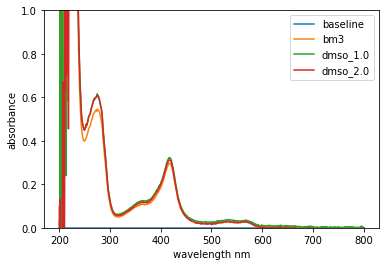

In [19]:
import matplotlib.pyplot as plt


plt.plot(df.loc['baseline',:])
plt.plot(df.loc['bm3',:])
plt.plot(df.loc['dmso_1.0',:])
plt.plot(df.loc['dmso_2.0',:])

plt.legend(df.index[:4])
plt.xlabel('wavelength nm')
plt.ylabel('absorbance')
plt.ylim(0,1)
plt.show()

# Plot the rest of the traces

In [20]:
# loop through the dataframe index, plot each row, add cosmetic changes

# 3. todo: extracting the compound concentrations
1. extract columns that contain ```"Arachadonic_acid"```
2. from those, extract numbers 
3. change number datatype from ```str``` to ```float```
4. dilution calculation

In [21]:
import re

def substrate_vols(idx):
    substrate = [i for i in idx if 'Arachadonic_acid' in i]
    regex = [re.findall('\d+.\d+', i) for i in substrate] # add some cheat sheet cmds
    vols = [float(i[0]) for i in regex]
    return vols

vols = substrate_vols(df.index)
vols

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

## 3.1 todo: calculate substrate concentration
Make a function that calculates the final concentration of the substrate using
```c1*v1=c2*v2```
given that the final volume is 1ml, the stock concentration is 10 mM and the additions are measured in µl.

# 4. todo: plotting 2 - colormaps and subplots 

# 5, todo: quantify Soret band shift and Michaelis-Menten curve fitting

*fact: this P450 responds mildly to DMSO, so procedure is to saturate the enzyme with DMSO (until is stops shifting) before adding test compound. This accounts for the columns ```'dmso_1.0'``` and ```dmso_2.0'```*